homework 5
---
due: April 24 2022

authors: pegler, prüwasser, scheftner

# Part 1: function to perform calculation

this function should take 3 inputs in the following order 1. predictor1 (age), 2. predictor (size), 3. outcome variable (price)

your function has to

1. create a predictor matrix (as above), starting with a column of ones, and the two predictors. (3 columns in total)
2. use lstsq () to fit the regression model, as above
3. the function should return 2 outputs, the 1st one is an array containing the 3 fitted regression parameters (1st output argument of lstsq()) , 2nd output should be the residual error (2nd output argument of lstsq()),

!! make sure that your function works for inputs of any size (this is important when you add the column of ones), (but you can assume that all of the 3 input vectors have the same length (otherwise the analysis does not make sense) 

In [78]:
def my_mult_regr():
    ...

# Part 2: standardized predictors

standardize (z-score) your predictors by subtracting the mean and dividing by the standard deviaton.

fit a regression with both the single predictor and the two predictor models and compare error and beta weigths for fitting the model to standardized and non-standardized data-sets

use the MyMultRegr() function in this solution

# Part 3: car price simulation  

price as a function of age

In [79]:
# given values
mean_price_new = 30_000
sd_price = 10_000
n = 200
age_min = 0
age_max = 70

## Finding a function and coefficients for a realistic curve

To fiddle with the values of the function, we could create numpy arrays and plot them, but we choose the sympy package as it's perfect for this kind of task.

https://www.sympy.org

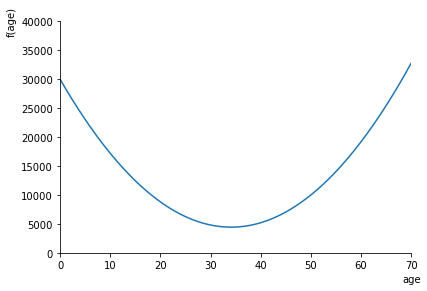

In [16]:
import sympy as spy

age, price_func = spy.symbols("age value")

b_0 = mean_price_new # avg value at age = 0
b_1 = 1500 # value loss per year
b_2 = 22 # value gain per year*year

price_func = b_0 - b_1 * age + b_2 * age**2

spy.plot(price_func,(age, 0, 70),xlim=(0,70),ylim=(0,40_000),axis_center=(0,0));

### Minimum is where derivative is 0

Derivative of price for age

In [17]:
d_age = spy.diff(price_func,age)
d_age

44*age - 1500

Age at minimum value

In [18]:
age_min = float(spy.solve(d_age)[0])
age_min

34.09090909090909

Minimum value

In [19]:
price_min = float(price_func.evalf(subs={age:age_min}))
price_min

4431.818181818182

## Create simulated data from function

In [73]:
price_func

22*age**2 - 1500*age + 30000

Function for one datapoint:

$$price = price_{mean} - 1500age + 22age² + error$$

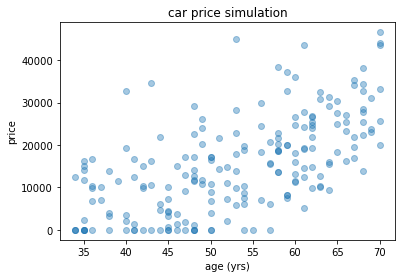

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def create_random_sample(mean_price_new,sd_price,age_min,age_max,n):
    """
    return two 1D-Arrays: one for ages and for prices  
    """

    # creating sample of car ages (uniformly distributed)
    sample_ages = np.random.randint(age_min,age_max+1,n)
    
    sample_prices = list()
    
    # creating corresponding price values for this sample
    for age in sample_ages:
        error = np.random.normal(0,sd_price)
        price = mean_price_new - b_1 * age + b_2 * age**2 + error
        sample_prices.append(price)

    sample_prices = np.array(sample_prices)
    sample_ages = np.array(sample_ages)

    # limit lowest price to 0
    sample_prices = np.where(sample_prices<0, 0, sample_prices)
    
    return sample_ages, sample_prices

sample_ages, sample_prices = create_random_sample(mean_price_new,sd_price,age_min,age_max,n)

plt.scatter(sample_ages,sample_prices, alpha=0.4)
plt.ylabel("price")
plt.xlabel("age (yrs)")
plt.title("car price simulation");

## Fit 3 regression models to the simulated data

   1. intercept + linear predictor age
   2. intercept + linear predictor + quadratic predictor x2
   3. intercept + linear predictor + quadratic predictor x2 + cubic predicor x3

print the obtained residual error for the three models and visualize the model predictions


In [83]:
# in preparation

# Bonus: reliability of regression analysis

since we created the data, we can see how close are the true values to the 'generative' model next task is to systematically investigate this relationship you will have to manipualte the number of datapoints, and the error in the model, and analyze the difference between the data generating and the fitted regression parameters

this task is somewhat analogous to the t-test simulation task 
